In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Redes aleatorias o Modelo de Erdos-Rényi

[2 2 2 2 2 4 3 4 4 1]


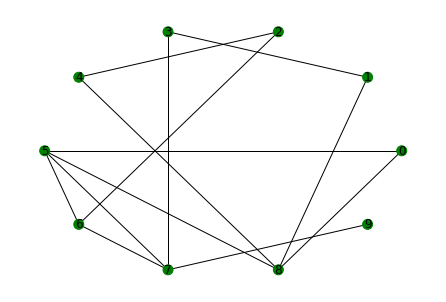

In [2]:
G = nx.Graph() #Generacion red
N = 10         #Número de nodos
pr = 0.1        #Probabilidad de enlace
#Añadir nodos
for i in range(N):
    G.add_node(i) 
#Añadir enlaces
a=[0,1]
omega=0
for w in range (N):
    for e in range (N):
        #Sin autointeracción
        if(w==e):
            omega
        else:
            b=np.random.choice(a,p=[1-pr,pr])
            if(b==1):
                G.add_edge(w,e)

colors=['g' for nodo in G]
nx.draw_circular(G, with_labels = True,node_color=colors, node_size=100)
Grado=np.array([G.degree[nodo] for nodo in G])
print(Grado)

# Modelo SIR Determinista

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math as mt
from scipy.integrate import odeint


def Der(Init,t,N,b,gamma):
    S, I, R,M = Init
    dS=-(b*S*I)/N
    dI=(b*S*I)/N-(gamma*I)
    dR=(19/20)*gamma*I
    dM=(1/20)*gamma*I
    
    return dS, dI, dR,dM
tiempo=100   #Dias totales
N=500    #Población total
S_0=N-1  #Población susceptible inicial
I_0=1    #Población infectada inicial
b=0.9  #Tasa de infección
R_0=0   #Población recuperada inicial
M_0=0   #Población fallecida inicial
gamma=0.1 #Tasa de recuperación
t = np.linspace(0, tiempo, tiempo)
Init=S_0,I_0,R_0,M_0
sol= odeint(Der, Init, t, args=(N, b,gamma))
S,I,R,M=sol.T


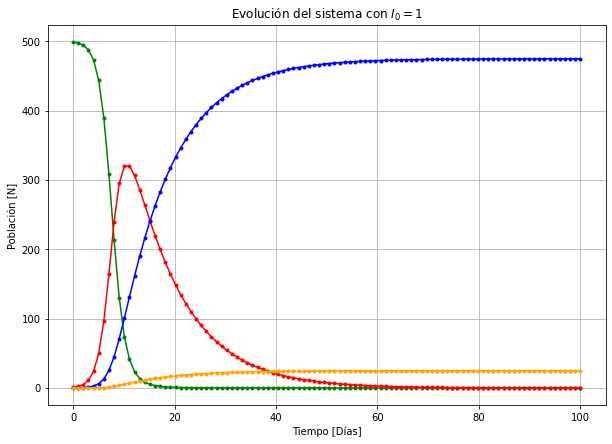

In [5]:
plt.figure(figsize=(10,7))
plt.plot(t,S, marker='.',color='g')
plt.plot(t,I, marker='.',color='r')
plt.plot(t,R, marker='.',color='b')
plt.plot(t,M, marker='.',color='orange')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Población [N]')
plt.title('Evolución del sistema con $I_0=1$')
plt.grid()
plt.show()

# Modelo de Barabási-Albert

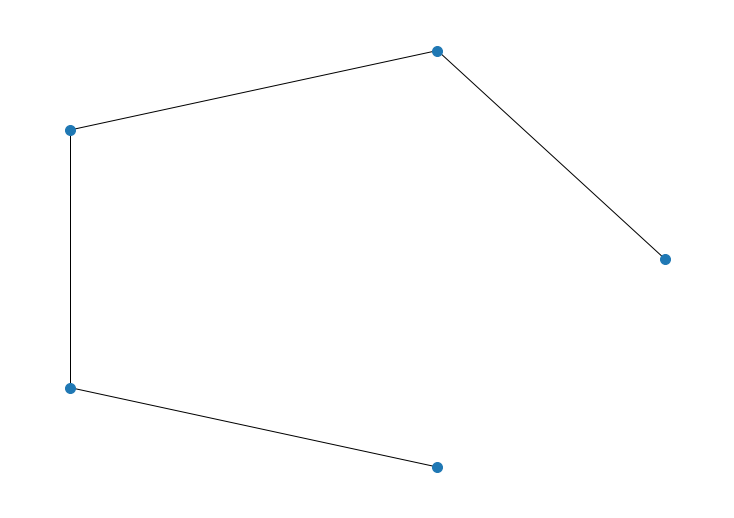

In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math as mt
from scipy.integrate import odeint
import random
G = nx.Graph() #Generacion red
N_0 = 5         #Número de nodos inicial
m=1            #Numero de enlaces de los nuevos nodos 
for i in range(N_0):
    G.add_node(i) 
for i in range(1,N_0):
    G.add_edge(i,i-1)
plt.figure(figsize=(10,7))
nx.draw_circular(G, with_labels = False, node_size=100)

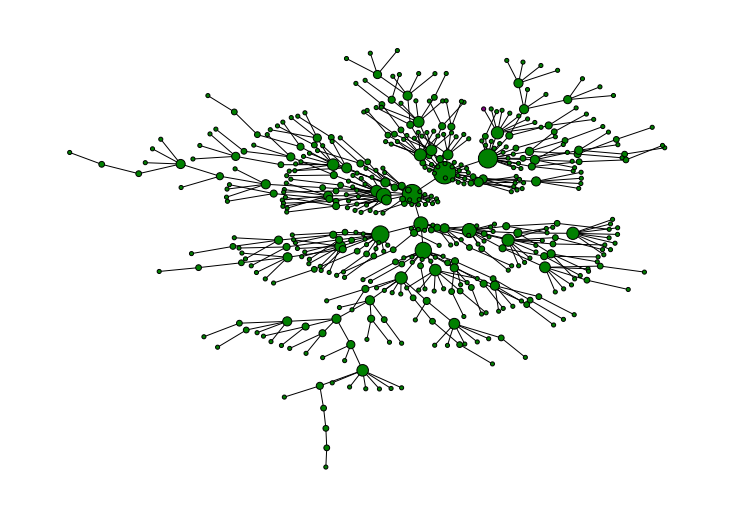

In [23]:
N=500 #Tamaño final de los nodos

for i in range(N-N_0):
    k=np.array([G.degree[nodo] for nodo in G])
    pro=k/k.sum() #Probabilidad de union de los nuevos nodos con uno antiguo
    Nenlace=np.random.choice(list(G), size=m, replace=False, p=pro)
    Pob1=len(G)
    for n in Nenlace:
        G.add_edge(Pob1,n)    

Tamaño=np.array([G.degree[nodo] for nodo in G]) #Cambio del tamaño del nodo en función del aumento en k
Tamaño=Tamaño/Tamaño.max()
colores=['g' for nodo in G]
colores[-1]='purple'
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)


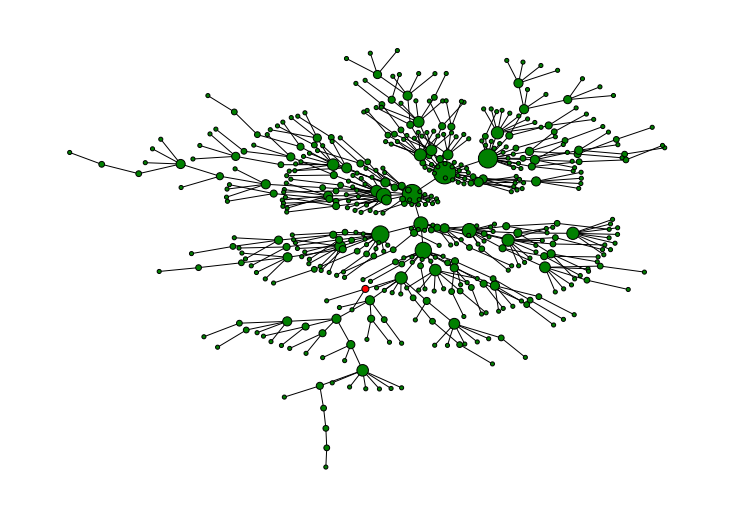

In [24]:
colores=['w' for nodo in G]
nx.set_node_attributes(G,'S','P')
nx.set_node_attributes(G,{np.random.randint(0,len(G)-1):'I'},'P')
nx.set_node_attributes(G,0,'Time')

su=0
inf=0
re=0
mu=0
for i in range (0,len(G)):         #Definición de las poblaciones iniciales y colores representativos
    if(G.nodes[i]['P']=='S'):
        su+=1
        colores[i]='g'
    if(G.nodes[i]['P']=='I'):
        inf+=1
        colores[i]='r'
    if(G.nodes[i]['P']=='R'):
        re+=1
        colores[i]='b'
    if(G.nodes[i]['P']=='M'):
        mu+=1
        colores[i]='orange'
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, node_size=Tamaño*500,edgecolors='k') #Estado inicial

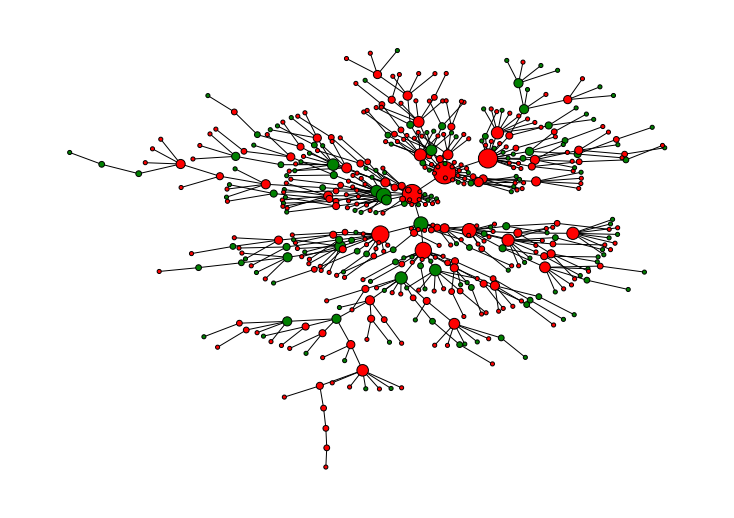

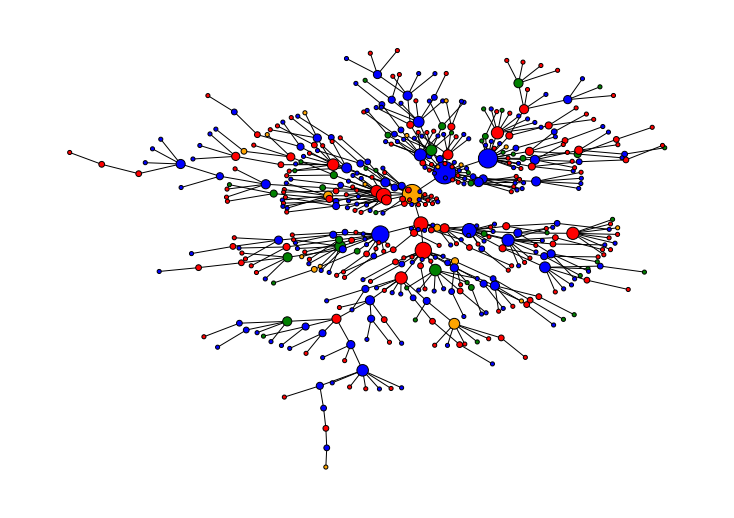

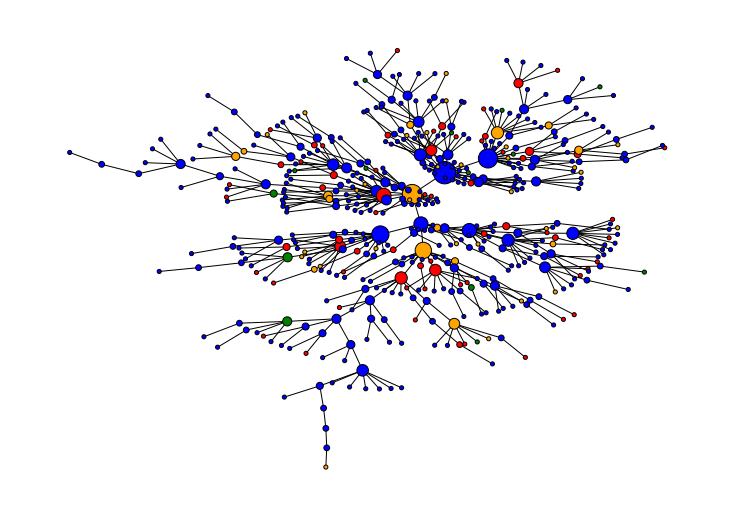

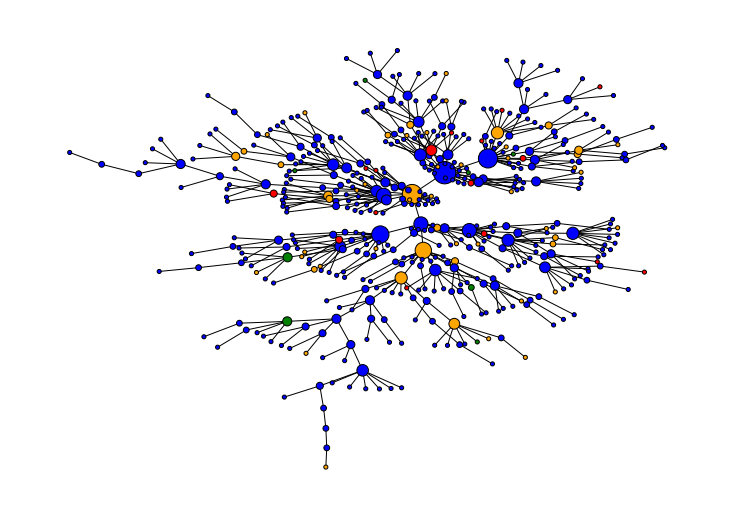

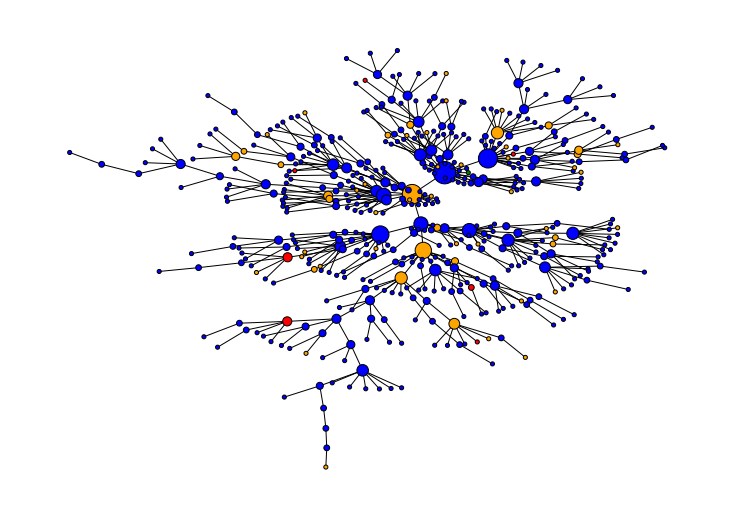

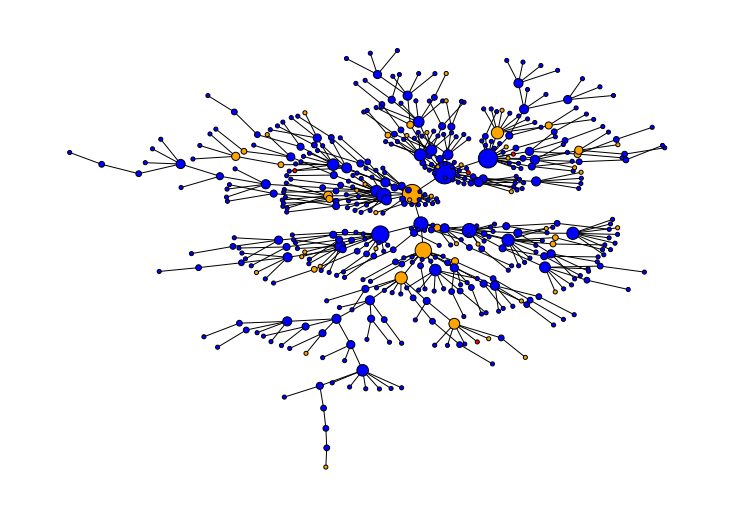

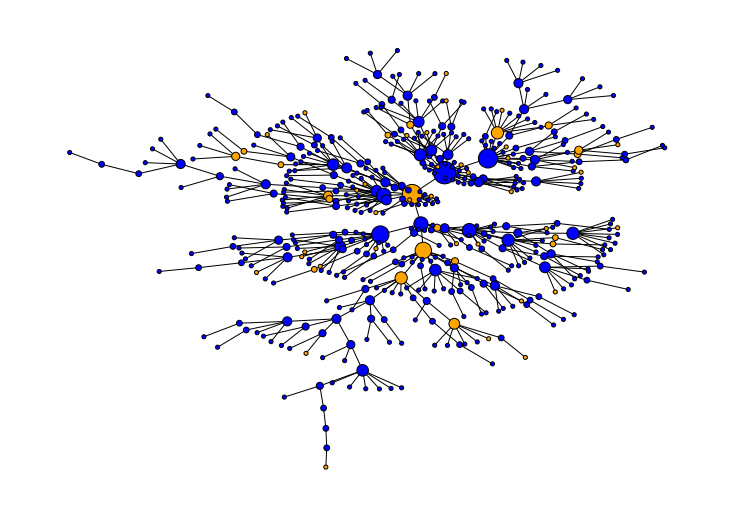

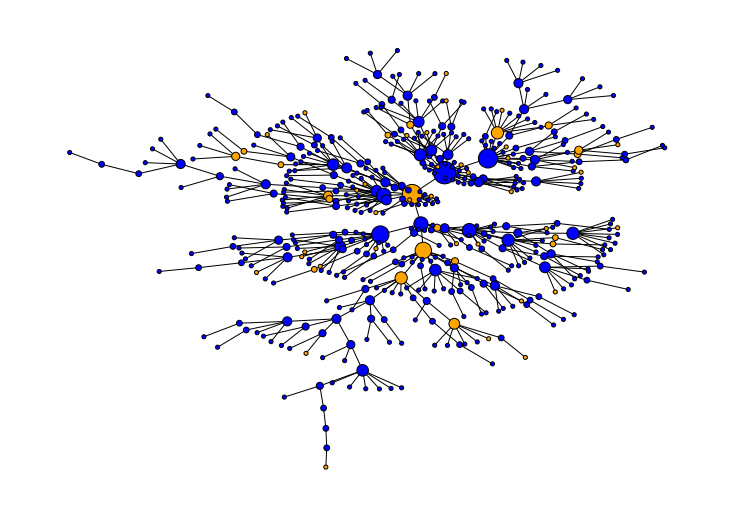

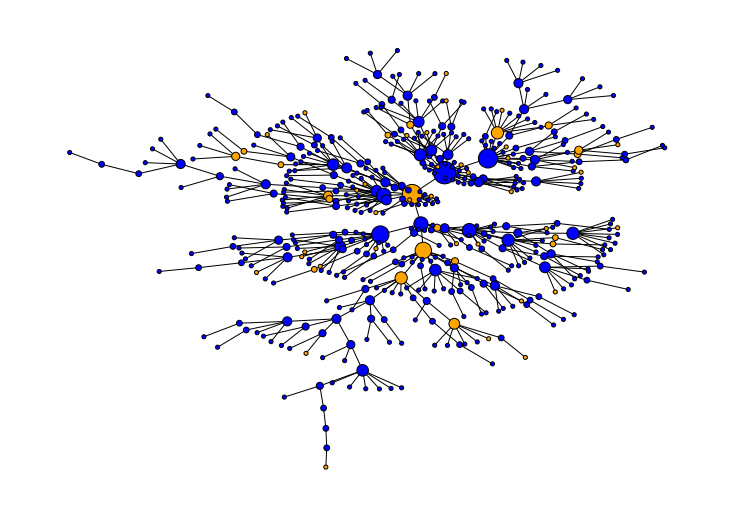

In [25]:
def Cambio(G,su,inf,re,mu,colores):
    for i in range (0,len(G)):
        if(G.nodes[i]['P']=='S'):
            su+=1
            colores[i]='g'
        if(G.nodes[i]['P']=='I'):
            inf+=1
            colores[i]='r'
        if(G.nodes[i]['P']=='R'):
            re+=1
            colores[i]='b'
        if(G.nodes[i]['P']=='M'):
            mu+=1
            colores[i]='orange'
    return G, su, inf, re, mu,colores
beta=0.1
gamma=0.9
Posib=[0,1]
Dat=[0,su,inf,re,mu]
tI=14
td=100
for t in range(1,td):                #Evolución del sistema en un tiempo td
    for j in range (0,len(G)):
        if(G.nodes[j]['P']=='S'):
            A=list(G.adj[i])
            bl=len(list(G.adj[j]))
            cl=0
            for al in range (0,bl):
                if(G.nodes[j]['P']=='I'):
                    cl+=1
                else:
                    cl=1
            prb=1-(1-beta)**(cl)
            b=np.random.choice(Posib,p=[1-prb,prb])
            if(b==1):
                    nx.set_node_attributes(G,{j:'I'},'P')
        else:
            if(G.nodes[j]['P']=='I'):
                G.nodes[j]['Time']+=1
                if(G.nodes[j]['Time']==tI):
                    b=np.random.choice(Posib,p=[1-gamma,gamma])
                    if(b==1):
                        nx.set_node_attributes(G,{j:'R'},'P')    
                    else:
                        nx.set_node_attributes(G,{j:'M'},'P')  
        G,su,inf,re,mu,colores=Cambio(G,0,0,0,0,colores)
    fila=t,su,inf,re,mu
    Dat = np.vstack([Dat, fila])
    if(t%10==0):
        plt.figure(figsize=(10,7))
        nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)
#nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, node_size=Tamaño*300,edgecolors='k') #Estado final 

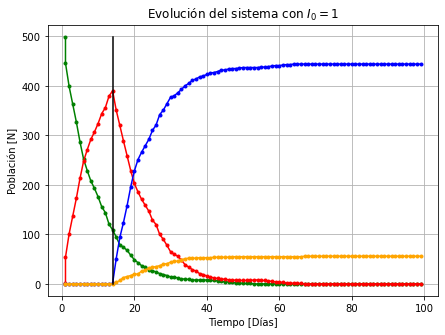

In [26]:
S=np.array([Dat[0][1]])
I=np.array([Dat[0][2]])
R=np.array([Dat[0][3]])
M=np.array([Dat[0][4]])
time=np.array([Dat[1][0]])
for i in range (1,len(Dat)):
    time=np.append(time,Dat[i][0])
    S=np.append(S,Dat[i][1])
    I=np.append(I,Dat[i][2])
    R=np.append(R,Dat[i][3])
    M=np.append(M,Dat[i][4])
    
Ref=np.array([tI])
tal=np.array([0])
for i in range (N):
    Ref=np.append(Ref,14)
    tal=np.append(tal,i)
    
plt.figure(figsize=(7,5))
plt.plot(time,S, marker='.',color='g')
plt.plot(time,I, marker='.',color='r')
plt.plot(time,R, marker='.',color='b')
plt.plot(time,M, marker='.',color='orange')
plt.plot(Ref,tal,color='black')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Población [N]')
plt.title('Evolución del sistema con $I_0=1$')
plt.grid()
plt.show()

# Y si estuviera infectado un hub?

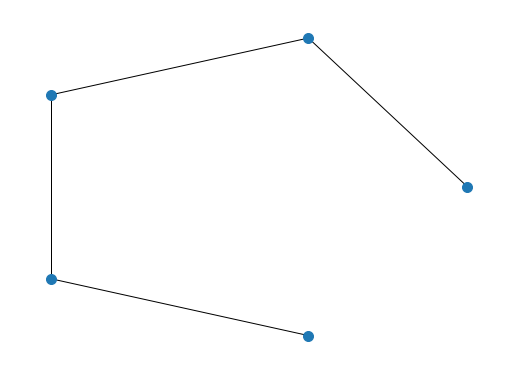

In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math as mt
from scipy.integrate import odeint
import random
G = nx.Graph() #Generacion red
N_0 = 5         #Número de nodos inicial
m=1            #Numero de enlaces de los nuevos nodos 
for i in range(N_0):
    G.add_node(i) 
for i in range(1,N_0):
    G.add_edge(i,i-1)
plt.figure(figsize=(7,5))
nx.draw_circular(G, with_labels = False, node_size=100)


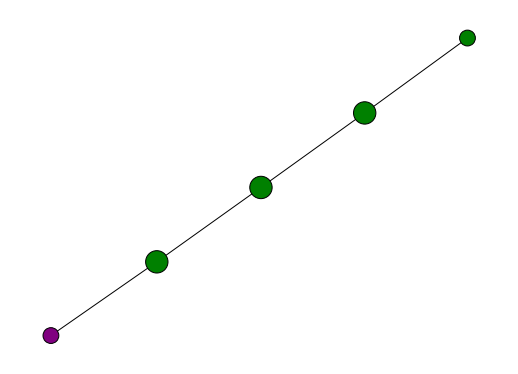

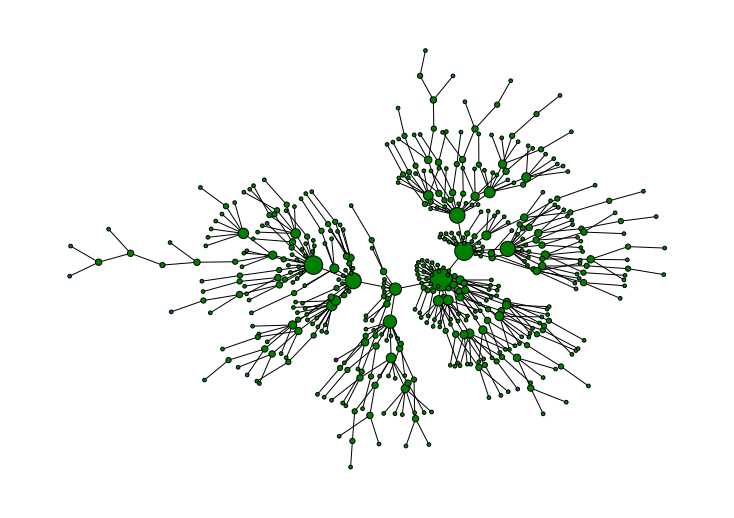

In [38]:

N=500 #Tamaño final de los nodos
plt.figure(figsize=(7,5))
Tamaño=np.array([G.degree[nodo] for nodo in G]) #Cambio del tamaño del nodo en función del aumento en k
Tamaño=Tamaño/Tamaño.max()
colores=['g' for nodo in G]
colores[-1]='purple'
nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)
for i in range(N-N_0):
    k=np.array([G.degree[nodo] for nodo in G])
    pro=k/k.sum() #Probabilidad de union de los nuevos nodos con uno antiguo
    Nenlace=np.random.choice(list(G), size=m, replace=False, p=pro)
    Pob1=len(G)
    for n in Nenlace:
        G.add_edge(Pob1,n)   
        '''  Producción del gif
    if(i%100==0):
        Tamaño=np.array([G.degree[nodo] for nodo in G]) #Cambio del tamaño del nodo en función del aumento en k
        Tamaño=Tamaño/Tamaño.max()
        colores=['g' for nodo in G]
        colores[-1]='purple'
        plt.figure(figsize=(10,7))
        nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)
'''
Tamaño=np.array([G.degree[nodo] for nodo in G]) #Cambio del tamaño del nodo en función del aumento en k
Tamaño=Tamaño/Tamaño.max()
colores=['g' for nodo in G]
colores[-1]='purple'
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)

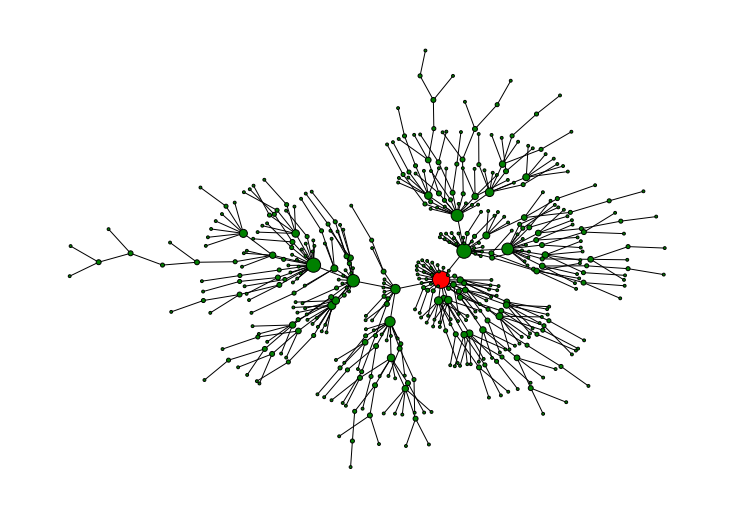

In [39]:
no=np.array([])
for i in range (0,len(G)):
    no=np.append(no,G.degree[i])
Infec=np.argmax(no) #Determinación del nodo con más enlaces

colores=['w' for nodo in G]
nx.set_node_attributes(G,'S','P')
nx.set_node_attributes(G,{Infec:'I'},'P')
nx.set_node_attributes(G,0,'Time')

su=0
inf=0
re=0
mu=0
for i in range (0,len(G)): #Definición de las condiciones iniciales
    if(G.nodes[i]['P']=='S'):
        su+=1
        colores[i]='g'
    if(G.nodes[i]['P']=='I'):
        inf+=1
        colores[i]='r'
    if(G.nodes[i]['P']=='R'):
        re+=1
        colores[i]='b'
    if(G.nodes[i]['P']=='M'):
        mu+=1
        colores[i]='orange'
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, node_size=Tamaño*300,edgecolors='k')

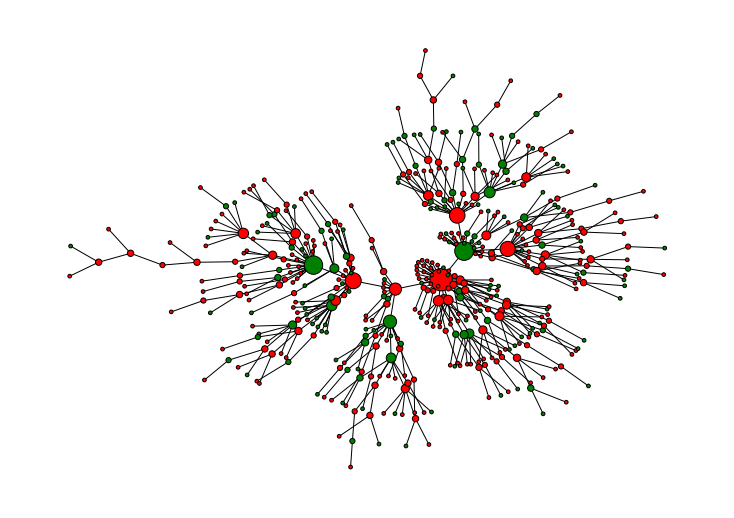

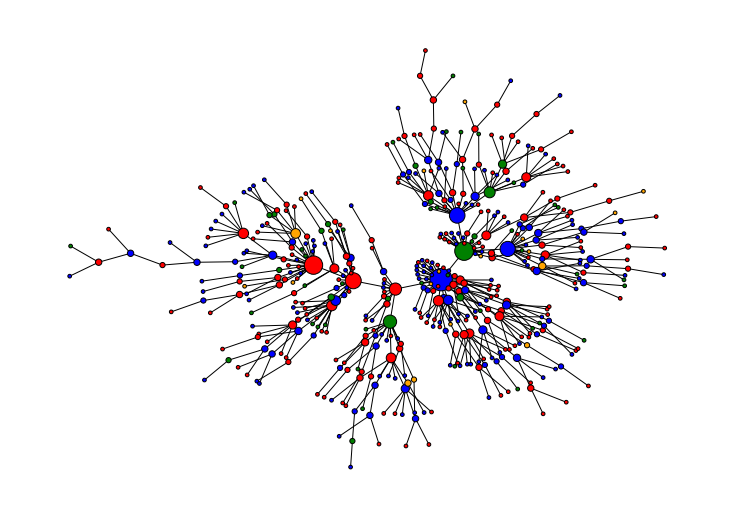

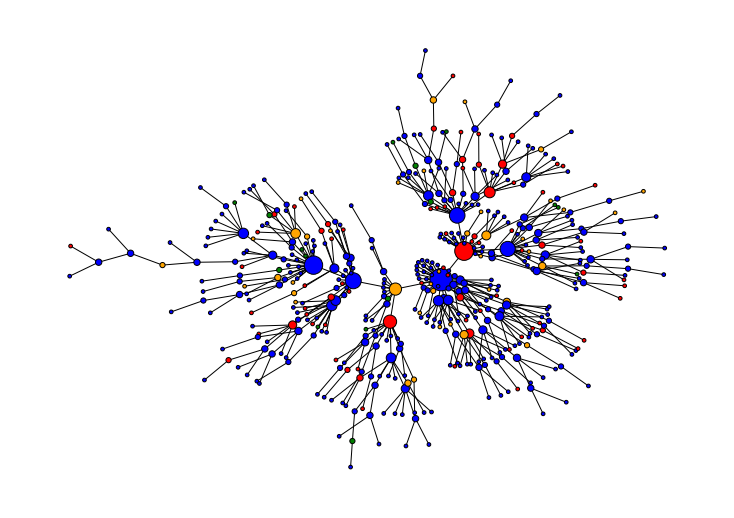

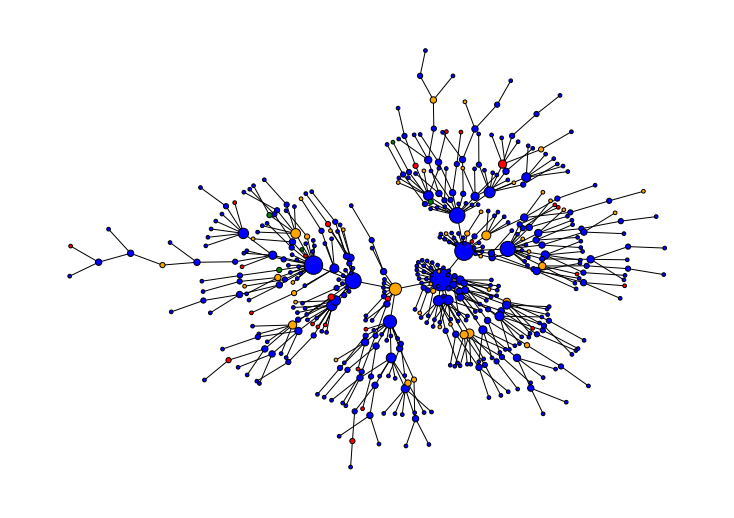

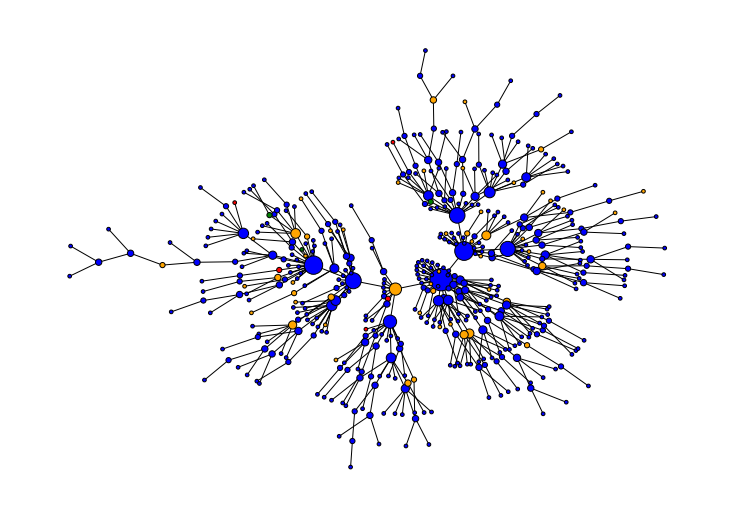

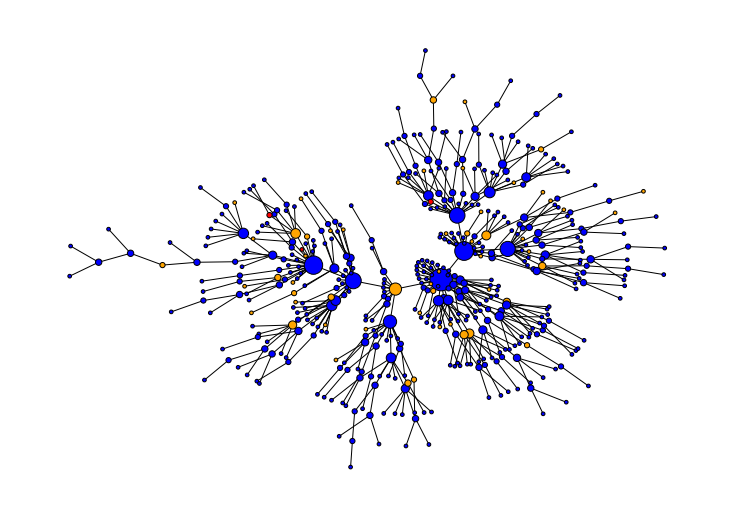

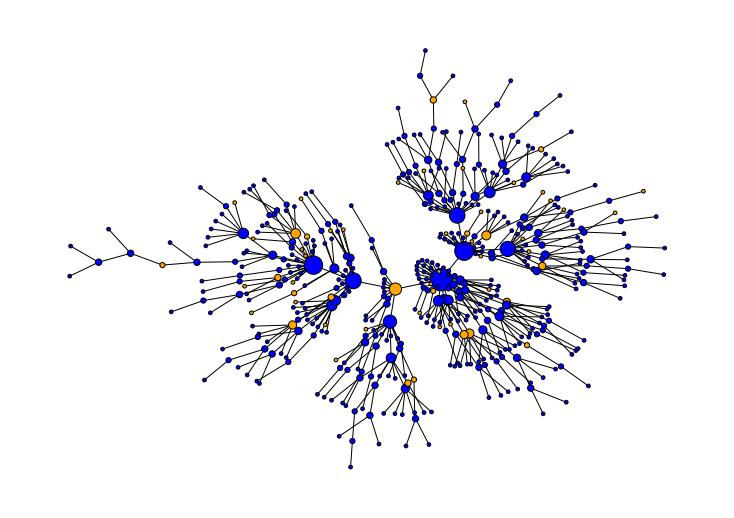

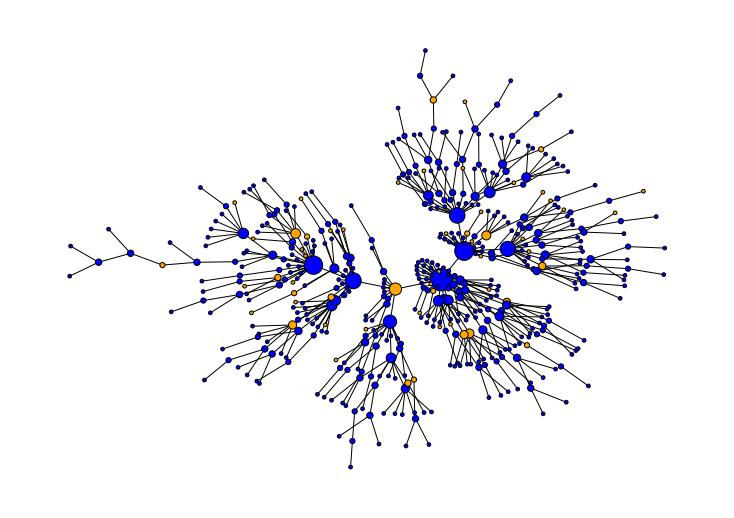

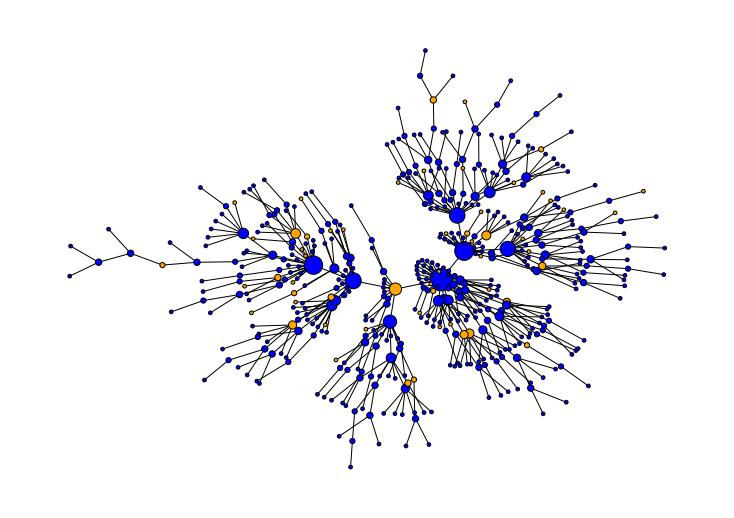

In [40]:
def Cambio(G,su,inf,re,mu,colores):
    for i in range (0,len(G)):
        if(G.nodes[i]['P']=='S'):
            su+=1
            colores[i]='g'
        if(G.nodes[i]['P']=='I'):
            inf+=1
            colores[i]='r'
        if(G.nodes[i]['P']=='R'):
            re+=1
            colores[i]='b'
        if(G.nodes[i]['P']=='M'):
            mu+=1
            colores[i]='orange'
    return G, su, inf, re, mu,colores
beta=0.1
gamma=0.9
Posib=[0,1]
Dat=[0,su,inf,re,mu]
tI=14
td=100
for t in range(1,td):     #Evolución del sistema en un tiempo td
    for j in range (0,len(G)):
        if(G.nodes[j]['P']=='S'):
            A=list(G.adj[i])
            bl=len(list(G.adj[j]))
            cl=0
            for al in range (0,bl):
                if(G.nodes[j]['P']=='I'):
                    cl+=1
                else:
                    cl=1
            prb=1-(1-beta)**(cl)
            b=np.random.choice(Posib,p=[1-prb,prb])
            if(b==1):
                    nx.set_node_attributes(G,{j:'I'},'P')
        else:
            if(G.nodes[j]['P']=='I'):
                G.nodes[j]['Time']+=1
                if(G.nodes[j]['Time']==tI):
                    b=np.random.choice(Posib,p=[1-gamma,gamma])
                    if(b==1):
                        nx.set_node_attributes(G,{j:'R'},'P')    
                    else:
                        nx.set_node_attributes(G,{j:'M'},'P')  
        G,su,inf,re,mu,colores=Cambio(G,0,0,0,0,colores)
    if(t%10==0):
        plt.figure(figsize=(10,7))
        nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, edgecolors='k',node_size=Tamaño*500)
    fila=t,su,inf,re,mu
    Dat = np.vstack([Dat, fila])
#nx.draw_kamada_kawai(G, with_labels = False,node_color=colores, node_size=Tamaño*300,edgecolors='k') #Estado final

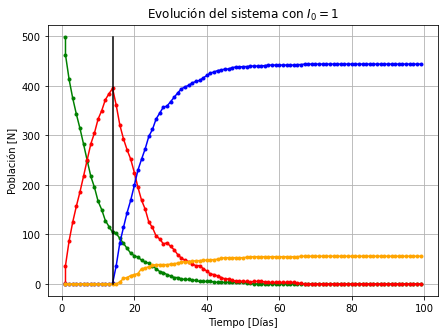

In [41]:
S=np.array([Dat[0][1]])
I=np.array([Dat[0][2]])
R=np.array([Dat[0][3]])
M=np.array([Dat[0][4]])
time=np.array([Dat[1][0]])
for i in range (1,len(Dat)):
    time=np.append(time,Dat[i][0])
    S=np.append(S,Dat[i][1])
    I=np.append(I,Dat[i][2])
    R=np.append(R,Dat[i][3])
    M=np.append(M,Dat[i][4])
    
Ref=np.array([tI])
tal=np.array([0])
for i in range (N):
    Ref=np.append(Ref,14)
    tal=np.append(tal,i)
    
plt.figure(figsize=(7,5))
plt.plot(time,S, marker='.',color='g')
plt.plot(time,I, marker='.',color='r')
plt.plot(time,R, marker='.',color='b')
plt.plot(time,M, marker='.',color='orange')
plt.plot(Ref,tal,color='black')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Población [N]')
plt.title('Evolución del sistema con $I_0=1$')
plt.grid()
plt.show()

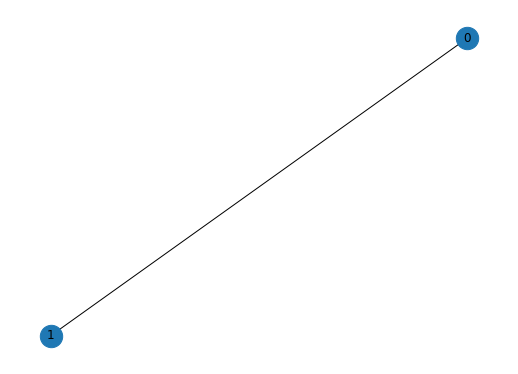

In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math as mt
from scipy.integrate import odeint
import random
G = nx.Graph() #Generacion red
N_0 = 2         #Número de nodos inicial
m=1            #Numero de enlaces de los nuevos nodos 
for i in range(N_0):
    G.add_node(i) 
for i in range(1,N_0):
    G.add_edge(i,i-1)
plt.figure(figsize=(7,5))
nx.draw_circular(G, with_labels = True, node_size=500)


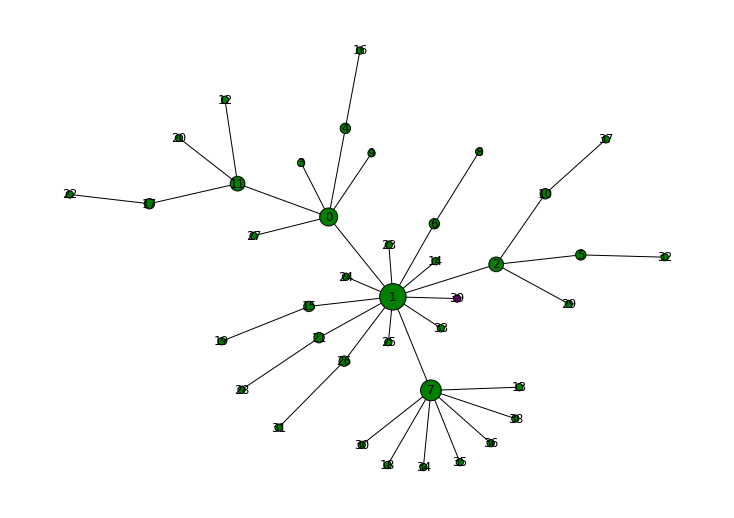

In [48]:
N=40 #Tamaño final de los nodos

for i in range(N-N_0):
    k=np.array([G.degree[nodo] for nodo in G])
    pro=k/k.sum() #Probabilidad de union de los nuevos nodos con uno antiguo
    Nenlace=np.random.choice(list(G), size=m, replace=False, p=pro)
    Pob1=len(G)
    for n in Nenlace:
        G.add_edge(Pob1,n)    

Tamaño=np.array([G.degree[nodo] for nodo in G]) #Cambio del tamaño del nodo en función del aumento en k
Tamaño=Tamaño/Tamaño.max()
colores=['g' for nodo in G]
colores[-1]='purple'
plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(G, with_labels = True,node_color=colores, edgecolors='k',node_size=Tamaño*700)